# Prerequisites

In [1]:
import sys

sys.path.append("..")

In [2]:
%load_ext autoreload
%autoreload 2

import argparse
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from IPython.display import display
from skimage.draw import line
from skimage.morphology import binary_dilation
from torchvision.models import resnet18, resnet50
from tqdm.notebook import tqdm

from dataset import (
    HWSetNoise,
    get_dloader,
    normalize_hw,
    normalize_hw_mask,
    normalize_inv_hw,
    normalize_inv_hw_mask,
    transform_test
)
from util import show_imarray

In [3]:
data_dir = "../data"

In [6]:
dset = HWSetNoise(data_dir, "val")

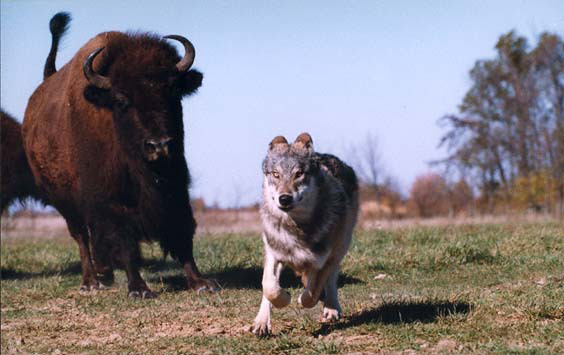

In [7]:
imgs, labels, masks, noise = dset[1]
imgs

In [8]:
imgs = np.array(imgs)

# Creating a W

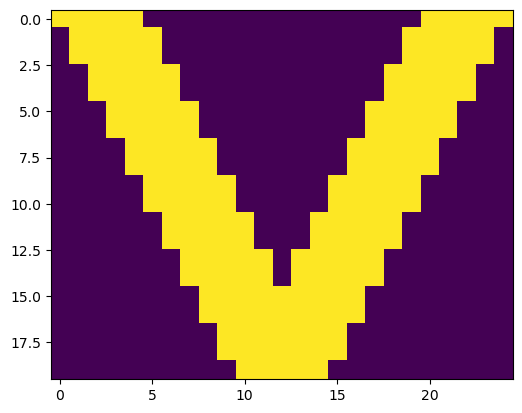

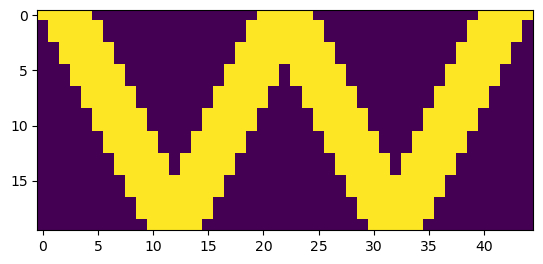

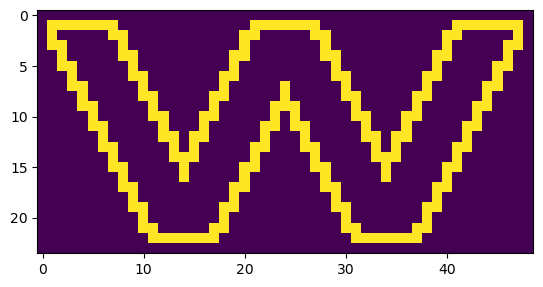

In [9]:
size = 20
width = size // 4
base = np.zeros((size, size + width)).astype(bool)
# base = np.ones(20)

rr, cc = line(0, 0, size - 1, size // 2)
for i in range(width):
    base[rr, cc + i] = 1

base |= base[:, ::-1]
w_im = np.hstack((base, np.zeros((size, size)))).astype(bool)
w_im[:, -size - width :] |= base

# plt.imshow(np.diag(np.ones(20)))
plt.imshow(base)
plt.show()
plt.imshow(w_im)
plt.show()

ol_size = size // 20
w_im = np.pad(w_im, 2 * ol_size)
outline = (
    binary_dilation(
        w_im,
        footprint=[
            (np.ones((3, 3)), ol_size),
        ],
    )
    ^ w_im
)
plt.imshow(outline)

In [10]:
xo, yo = imgs.shape[0] // 50, imgs.shape[1] // 50
imgs[xo : w_im.shape[0] + xo, yo : w_im.shape[1] + yo][w_im] = 255
imgs[xo : w_im.shape[0] + xo, yo : w_im.shape[1] + yo][outline] = 0

In [11]:
xo

7

In [12]:
imgs.shape

(355, 564, 3)

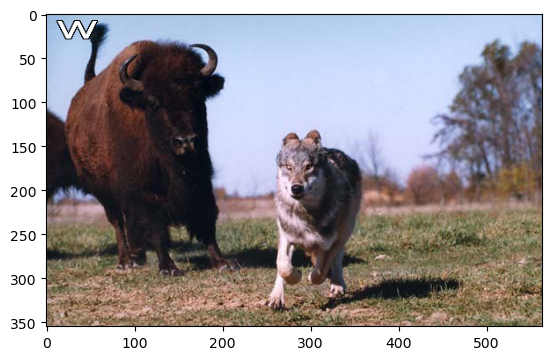

In [13]:
plt.imshow(imgs)

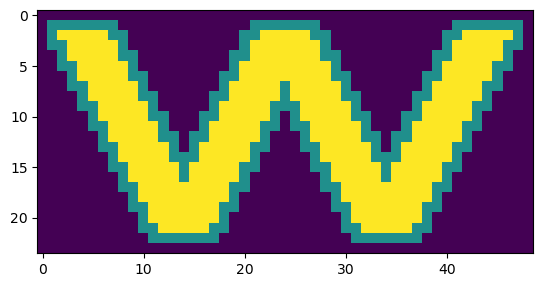

In [14]:
w_template = np.zeros_like(w_im).astype(np.uint8)
w_template[w_im] = 255
w_template[outline] = 255 // 2
plt.imshow(w_template)
plt.show()

In [15]:
np.save('../data/w_template.npy', w_template)

# Unit test

In [35]:
dset = HWSetNoise(data_dir, "val", transform_shared=transform_test, spurious=True)
# dset = HWSetNoise(data_dir, "val", transform_shared=transform_test, spurious=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


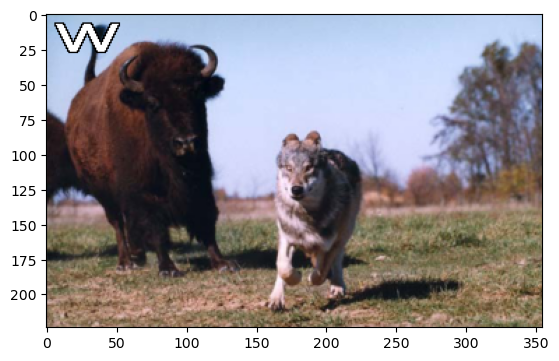

In [38]:
im, label, mask, noise = dset[1]
show_imarray(im)

In [28]:
dset.spurious_template_torch.shape

torch.Size([24, 49])